#來聊聊「回測過度最佳化」吧！
<img src="fig/overfitting_looklike.png" width=430>
reference: http://www.knewton.com/tech/blog/2014/09/online-cross-validation-predict-future-student-behavior/

#With four parameters I can fit an elephant and with five I can make him wiggle his trunk.
## -- John von Neumann

# 什麼是回測過度最佳化？
* 想想這個情況，如果有一間投資公司精準命中股票的漲跌，連續十個月，你願不願意把錢給這間公司管？

* 這間投資公司每月會寄出 1024 封信給投資人，一半預測「上漲」，一半建議「下跌」
* 一個月後，再針對剩下的 512 投資人發信，一半預測「上漲」，一半建議「下跌」
* 如此過了十個月後，就會有1個投資人全數命中

* 這個幸運的投資人可能以為公司超神，但是他不曉得公司做了多少錯誤的預測

* 這就是回測過度最佳化：只要回測次數(參數)夠多，總能找到一個不錯的結果！

* 透過過度最佳化得到的模型，很可能毫無預測力！

# 如何檢查回測過度最佳化？
1. <b>取樣期間要均勻</b>
<img src="fig/twse_index.png" height=430>

# 如何檢查回測過度最佳化？
1. 取樣期間要均勻
2. <b>參數穩定性檢查</b>
<img src="fig/contour.jpg" width=430>
reference:http://pic.pimg.tw/wenschair/1342544038-2503252194_n.jpg?v=1342544039

# 如何檢查回測過度最佳化？
1. 取樣期間要均勻
2. 參數穩定性檢查
3. <b>Hold-out 法</b>
    * 將資料分成 in-sample & out-of-sample
    * 衡量 out-of-sample 是否仍有好的績效表現
<img src="fig/hold-out.png" width=430>

# 如何檢查回測過度最佳化？
1. 取樣期間要均勻
2. 參數穩定性檢查
3. Hold-out 法
4. <b>向前推進法 (walk forward analysis)</b>
    * 時空環境改變，參數並非固定不變，需要漸進式找解
    * [R] <a href="https://4310b1a9-a-a8fb2076-s-sites.googlegroups.com/a/r-programming.org/home/files/WFA.pdf?attachauth=ANoY7cq2HO7ybe_0Di16hD-81xL8KslepAcDXvcmRpjp_i824dXxNRFIhv_K-cjYBfMF31ThLsOjX3B8qarLlN94mIfrITthsCyCDubdvNpWt5DAT48nG53N8DyE1mhfEAwN6jjOnzckoZU95GDAB-eK0n2g7ZPqWXPmHZLdmObKsdbslHCFlSVT5-Lkm0ueCN8iHNa8qw8truW0KBFsckIuluoOZtCfUQ%3D%3D&attredirects=0">quandstrat:: walk.forward</a>

<img src='fig/wfa.jpg' width=860>

# 如何檢查回測過度最佳化？
1. 取樣期間要均勻
2. 參數穩定性檢查
3. Hold-out 法
4. 向前推進法 (walk forward analysis)
5. <b>估計 backtest overfitting 的機率</b>

* <a href="http://www.rinfinance.com/agenda/2014/talk/MatthewBarry.pdf">The Probability of Backtest Overfitting</a> @ R Finance  2014
* 用很簡單直覺的方式定義 backtest overfitting 的機率，很容易應用在不同類型策略上
* [R) pbo
<img src='fig/pbo.png' height=430>

# 直覺的解釋
* 如果沒發生 backtest overfitting ...
    * In-sample 表現好的策略，Out-of-sample 也要表現的相對好

# 也就是說，如果 In-sample 表現好的策略，居然輸給 Out-of-sample 大部分的策略，這就是 Backtest overfitting 了！



# 發生1次歪掉就算醜一
<img src="fig/hold-out.png" height=430>

# 如果十次測試中有1個醜一，Prob(backtest overfitting) = 1/10 = 10%

# 等等，資料只有一份阿，哪來的十次測試？？？

#Combinational Symmetric Cross Validation
* 類似 Cross Validation
* 但是 traing & testing 切的一樣大
* 以避免資料長度不同的比較誤差
<img src="fig/cross_validation.png" height=300>
* reference: http://blog.kaggle.com/2015/06/29/scikit-learn-video-7-optimizing-your-model-with-cross-validation/

* 關於 CSCV 方法更詳細的介紹，請參考 <a href="http://nbviewer.ipython.org/format/slides/github/exilespacer/ProbabilityOfBacktestOverfitting/blob/master/Probability_of_overfitting.ipynb#/">link</a>.

# 延續剛剛 moving average crossover 的策略，我們來估計一下 overfitting 的機率
* 使用 R 套件： pbo
* 其實自己寫也蠻快的拉，參見 Python 版本 <a href="https://github.com/exilespacer/ProbabilityOfBacktestOverfitting/blob/master/CSCV.ipynb">link</a>

In [4]:
library(pbo)

Loading required package: lattice


In [15]:
df <- read.csv('~/coscup_pbo/data/backtest_result.csv', header=T)
tail(df)

,X10.40,X10.45,X10.50,X10.55,X10.60,X10.65,X15.40,X15.45,X15.50,X15.55,X15.60,X15.65,X20.40,X20.45,X20.50,X20.55,X20.60,X20.65,X25.40,X25.45,X25.50,X25.55,X25.60,X25.65,X30.40,X30.45,X30.50,X30.55,X30.60,X30.65
1728,0,0.0002979172,0.0002979172,0.0002979172,0.0002979172,0.0002979172,0.0002979172,0.0002979172,0.0002979172,0.0002979172,0.0002979172,0.0002979172,0.0002979172,0.0002979172,0.0002979172,0.0002979172,0.0002979172,0.0002979172,0.0002979172,0.0002979172,0.0002979172,0.0002979172,0.0002979172,0.0002979172,0.0002979172,0.0002979172,0.0002979172,0.0002979172,0.0002979172,0.0002979172
1729,0,0,0.009677418,0.009677418,0.009677418,0.009677418,0.009677418,0.009677418,0.009677418,0.009677418,0.009677418,0.009677418,0.009677418,0.009677418,0.009677418,0.009677418,0.009677418,0.009677418,0.009677418,0.009677418,0.009677418,0.009677418,0.009677418,0.009677418,0.009677418,0.009677418,0.009677418,0.009677418,0.009677418,0.009677418
1730,0,0.003031551,0.003031551,0.003031551,0.003031551,0.003031551,0.003031551,0.003031551,0.003031551,0.003031551,0.003031551,0.003031551,0.003031551,0.003031551,0.003031551,0.003031551,0.003031551,0.003031551,0.003031551,0.003031551,0.003031551,0.003031551,0.003031551,0.003031551,0.003031551,0.003031551,0.003031551,0.003031551,0.003031551,0.003031551
1731,0,0.007806374,0.007806374,0.007806374,0.007806374,0.007806374,0.007806374,0.007806374,0.007806374,0.007806374,0.007806374,0.007806374,0.007806374,0.007806374,0.007806374,0.007806374,0.007806374,0.007806374,0.007806374,0.007806374,0.007806374,0.007806374,0.007806374,0.007806374,0.007806374,0.007806374,0.007806374,0.007806374,0.007806374,0.007806374
1732,-0.001924103,-0.001924103,-0.001924103,-0.001924103,-0.001924103,-0.001924103,-0.001924103,-0.001924103,-0.001924103,-0.001924103,-0.001924103,-0.001924103,-0.001924103,-0.001924103,-0.001924103,-0.001924103,-0.001924103,-0.001924103,-0.001924103,-0.001924103,-0.001924103,-0.001924103,-0.001924103,-0.001924103,-0.001924103,-0.001924103,-0.001924103,-0.001924103,-0.001924103,-0.001924103
1733,0.004180748,0.004180748,0.004180748,0.004180748,0.004180748,0.004180748,0.004180748,0.004180748,0.004180748,0.004180748,0.004180748,0.004180748,0.004180748,0.004180748,0.004180748,0.004180748,0.004180748,0.004180748,0.004180748,0.004180748,0.004180748,0.004180748,0.004180748,0.004180748,0.004180748,0.004180748,0.004180748,0.004180748,0.004180748,0.004180748


# 衡量因子
## 這裡用 Sharp ratio=$\frac{mean(ret)−ret_f}{std(ret)}$
* 獲利風險比： 承受一單位風險，可以獲得多少收益

In [ ]:
mySharpeRatio <- function(df){
  apply(df, 2, function(x) mean(x)/sd(x))
}

# 估計 probability of backtest overfitting

In [16]:
p <- pbo(df, s=8,  f=mySharpeRatio, threshold=0)
summary(p)

Performance function mySharpeRatio with threshold 0



p_bo       slope        ar^2      p_loss 
 0.05714286 -0.01900500  0.05800000  0.00000000

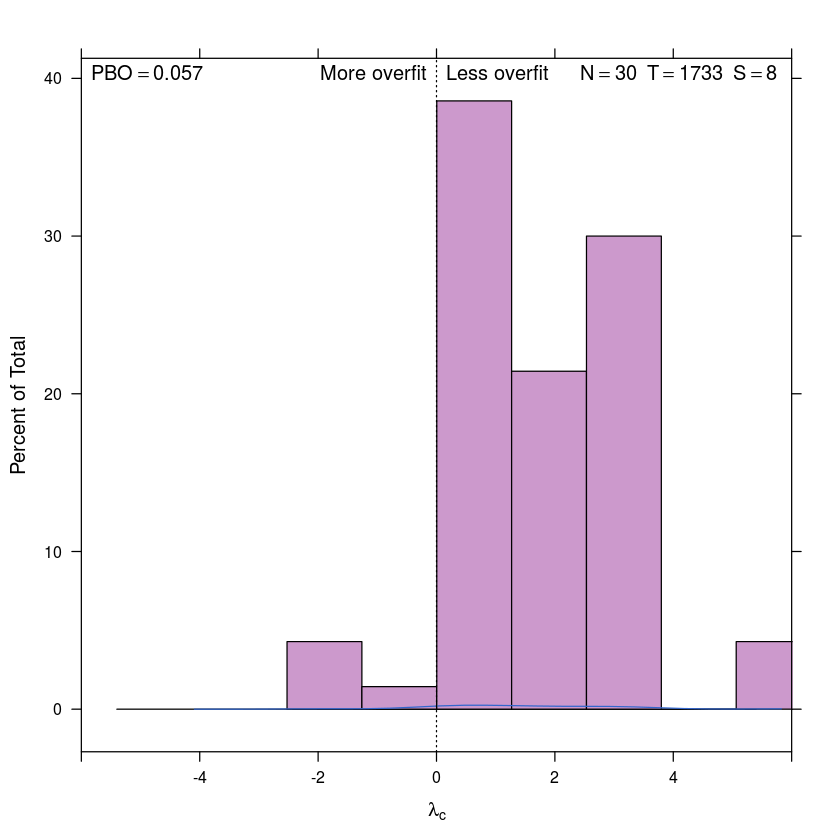

In [8]:
histogram(p)

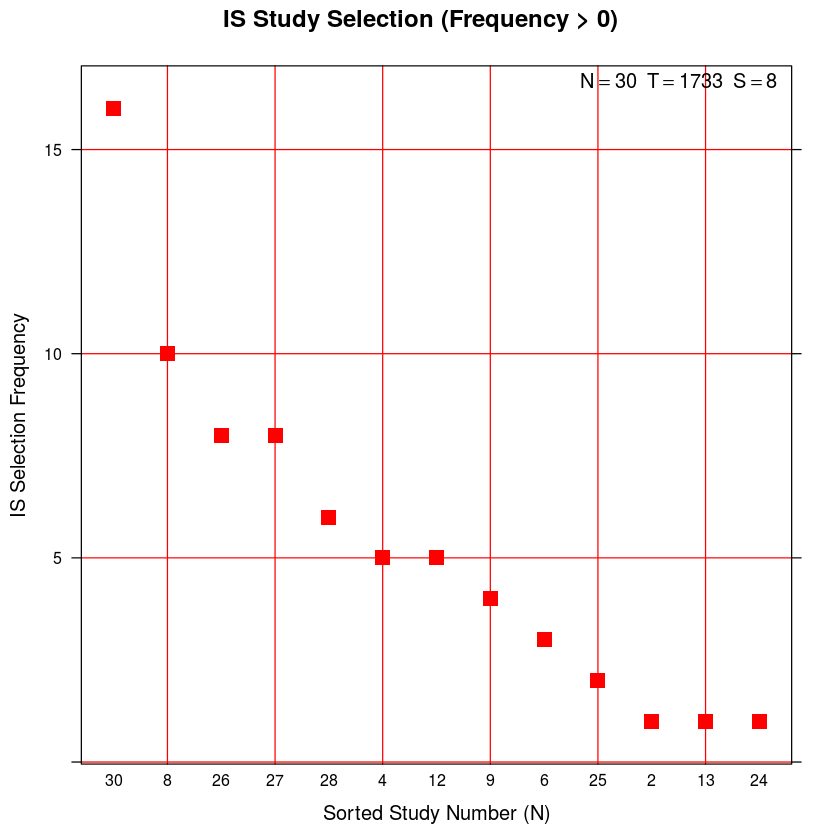

In [9]:
dotplot(p,pch=15,col=2,cex=1.5)

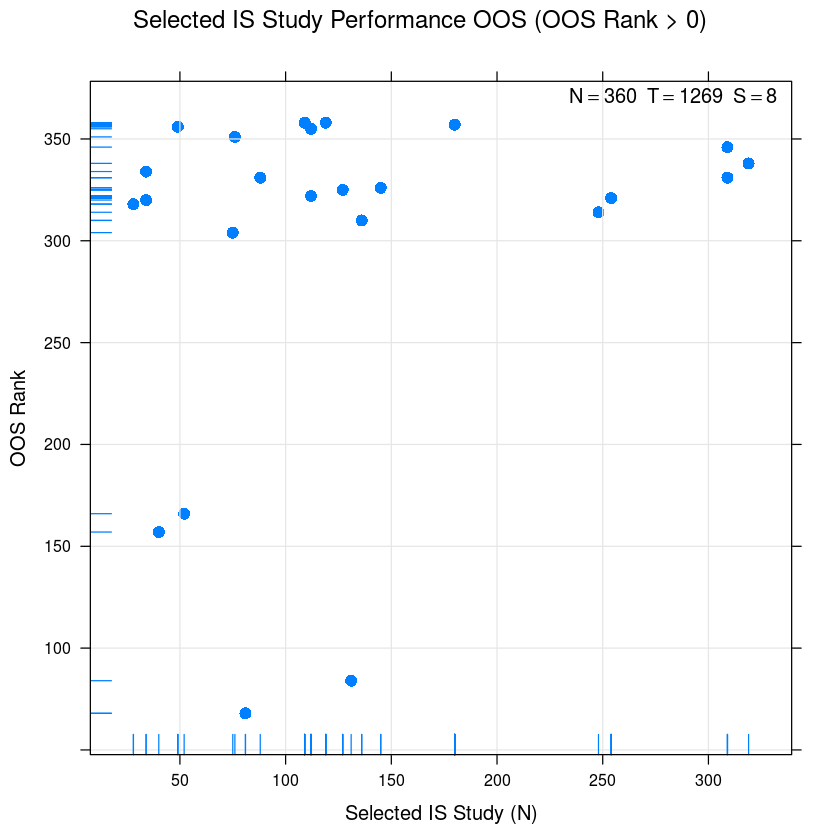

In [25]:
# The ranks type shows the sorted performance ranks results.
xyplot(p,plotType="ranks",pch=16,cex=1.2)

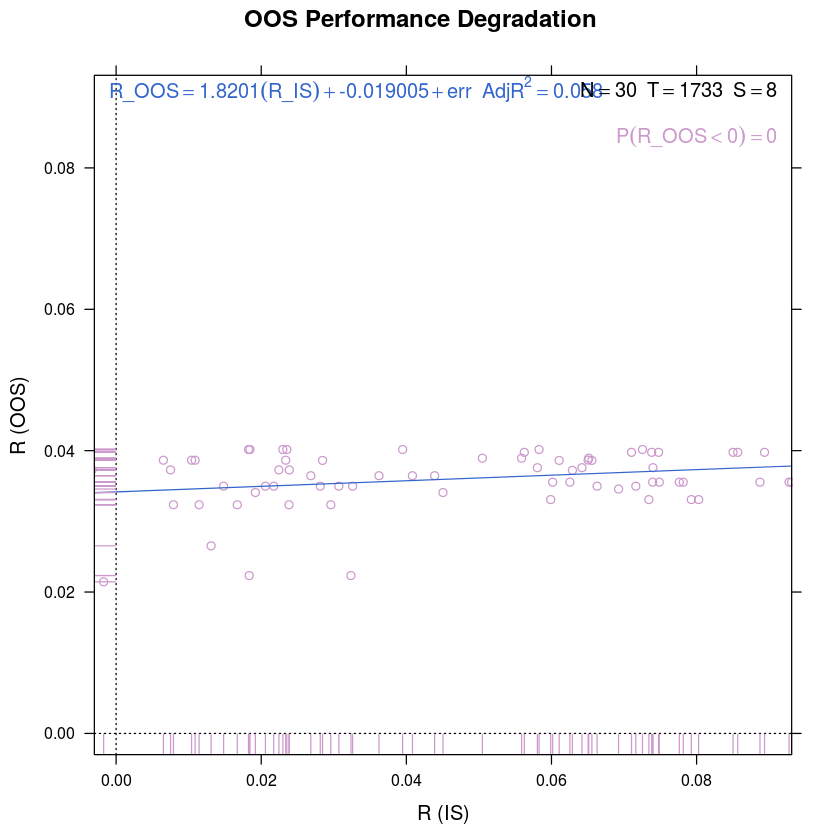

In [11]:
# The degradation type shows the performance degradation regression fit results and the probability of loss.
xyplot(p,plotType="degradation")